## Before you start

In [ ]:
!nvidia-smi

Mon Sep 23 07:09:46 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Download the data

In [ ]:
# https://www.kaggle.com/datasets/saikatdatta1994/tea-leaf-disease

In [ ]:
from google.colab import files

# Upload the Kaggle API key
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pavantejamedi","key":"9641de9cc08907ccfb8c3aa4cf6797c5"}'}

In [ ]:
import os

# Move the Kaggle API key to the required location
os.makedirs('/root/.kaggle', exist_ok=True)
os.rename('kaggle.json', '/root/.kaggle/kaggle.json')

# Set permissions for the API key
os.chmod('/root/.kaggle/kaggle.json', 600)

In [ ]:
import kaggle

# Define the username and dataset name
username = "saikatdatta1994"
dataset_name = "tea-leaf-disease"

# Download the dataset
kaggle.api.dataset_download_files(username + '/' + dataset_name, unzip=True)

Dataset URL: https://www.kaggle.com/datasets/saikatdatta1994/tea-leaf-disease


## Data Augmentation

In [ ]:
pip install tensorflow


In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, save_img

# Define paths
input_dir = '/content/Tea_Leaf_Disease'
output_dir = '/content/Augmented_data'

# Define augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Loop through each class in the dataset
for class_name in os.listdir(input_dir):
    class_input_dir = os.path.join(input_dir, class_name)
    class_output_dir = os.path.join(output_dir, class_name)

    # Create class output directory if it doesn't exist
    if not os.path.exists(class_output_dir):
        os.makedirs(class_output_dir)

    # Loop through each image in the class folder
    for img_name in os.listdir(class_input_dir):
        img_path = os.path.join(class_input_dir, img_name)

        # Load the image
        img = load_img(img_path)
        img_array = img_to_array(img)
        img_array = img_array.reshape((1,) + img_array.shape)  # Reshape for the generator

        # Generate 5 augmented images for each original image
        i = 0
        for batch in datagen.flow(img_array, batch_size=1, save_to_dir=class_output_dir, save_prefix=class_name, save_format='jpg'):
            i += 1
            if i > 5:  # Generate 5 images per original
                break


## Count Num of Images

In [ ]:
import os

def count_images_in_folder(folder_path):
    class_counts = {}

    # Iterate over all subdirectories (i.e., classes) within the folder
    for class_folder in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_folder)

        # Check if it's a directory
        if os.path.isdir(class_path):
            # List all files in the class directory
            num_images = len([f for f in os.listdir(class_path) if f.endswith(('.jpg', '.jpeg', '.png'))])
            class_counts[class_folder] = num_images

    return class_counts

# Base path to your dataset folder
base_path = '/content'

# Define the dataset directories you want to check
dataset_directories = ['Augmented_data','Tea_Leaf_Disease']

# Loop through the dataset directories and count the images
for directory in dataset_directories:
    print(f"Image counts in '{directory}' folder:")

    # Use base_path to construct the full path
    folder_path = os.path.join(base_path, directory)

    if os.path.exists(folder_path):
        class_counts = count_images_in_folder(folder_path)

        # Print the counts for each class
        for class_name, num_images in class_counts.items():
            print(f"  {class_name}: {num_images} images")
    else:
        print(f"  Folder '{folder_path}' does not exist.")

    print("\n")


Image counts in 'Augmented_data' folder:
  healthy: 4530 images
  algal_spot: 4499 images
  gray_blight: 4496 images
  brown_blight: 4020 images
  helopeltis: 4535 images
  red_spot: 4488 images


Image counts in 'Tea_Leaf_Disease' folder:
  healthy: 1000 images
  algal_spot: 1000 images
  gray_blight: 1000 images
  brown_blight: 867 images
  helopeltis: 1000 images
  red_spot: 1000 images




## Merge Augmented and original data

In [ ]:
import os
import shutil

# Define paths for original and augmented datasets
real_images_dir = '/content/Tea_Leaf_Disease'
augmented_images_dir = '/content/Augmented_data'
merged_images_dir = 'Merged_Dataset'  # Directory where merged data will be stored

# Create the merged dataset folder if it doesn't exist
if not os.path.exists(merged_images_dir):
    os.makedirs(merged_images_dir)

# Loop through both real and augmented datasets
for dataset_dir in [real_images_dir, augmented_images_dir]:
    for class_name in os.listdir(dataset_dir):
        class_dir = os.path.join(dataset_dir, class_name)
        merged_class_dir = os.path.join(merged_images_dir, class_name)

        # Create the class folder in the merged dataset directory if it doesn't exist
        if not os.path.exists(merged_class_dir):
            os.makedirs(merged_class_dir)

        # Copy all images from the current class directory to the merged directory
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            destination_path = os.path.join(merged_class_dir, img_name)

            # Copy the image to the merged dataset
            shutil.copy(img_path, destination_path)

print("Merged dataset created successfully in 'Merged_Dataset' folder!")


Merged dataset created successfully in 'Merged_Dataset' folder!


## Count Num of Images

In [ ]:
import os

def count_images_in_folder(folder_path):
    class_counts = {}

    # Iterate over all subdirectories (i.e., classes) within the folder
    for class_folder in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_folder)

        # Check if it's a directory
        if os.path.isdir(class_path):
            # List all files in the class directory
            num_images = len([f for f in os.listdir(class_path) if f.endswith(('.jpg', '.jpeg', '.png'))])
            class_counts[class_folder] = num_images

    return class_counts

# Base path to your dataset folder
base_path = '/content'

# Define the dataset directories you want to check
dataset_directories = ['Merged_Dataset']

# Loop through the dataset directories and count the images
for directory in dataset_directories:
    print(f"Image counts in '{directory}' folder:")

    # Use base_path to construct the full path
    folder_path = os.path.join(base_path, directory)

    if os.path.exists(folder_path):
        class_counts = count_images_in_folder(folder_path)

        # Print the counts for each class
        for class_name, num_images in class_counts.items():
            print(f"  {class_name}: {num_images} images")
    else:
        print(f"  Folder '{folder_path}' does not exist.")

    print("\n")


Image counts in 'Merged_Dataset' folder:
  healthy: 5530 images
  algal_spot: 5499 images
  gray_blight: 5496 images
  brown_blight: 4887 images
  helopeltis: 5535 images
  red_spot: 5488 images




## Prepare the Data

Dataset Structure
```
Dataset
│
└───train
│   └───ClassA
│       │   ClassA_1.jpg
│       │   ClassA_2.jpg
│       │   ...
│   └───ClassB
│       │   ClassB_1.jpg
│       │   ClassB_2.jpg
│       │   ...
│   └───...
└───test
│   └───ClassA
│       │   ClassA_9090.jpg
│       │   ClassA_9895.jpg
│       │   ...
│   └───ClassB
│       │   ClassB_2343.jpg
│       │   ClassB_2312.jpg
│       │   ...
│   └───...
└───val
│   └───ClassA
│       │   ClassA_3070.jpg
│       │   ClassA_2845.jpg
│       │   ...
│   └───ClassB
│       │   ClassB_2903.jpg
│       │   ClassB_2232.jpg
│       │   ...
│   └───...
```


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

In [ ]:
!mkdir '/content/Final_Dataset'
DATA_DIR='/content/Final_Dataset'

In [ ]:
source_dataset_path = '/content/Merged_Dataset'
destination_dataset_path = '/content/Final_Dataset'

In [ ]:
os.makedirs(os.path.join(destination_dataset_path, 'train'), exist_ok=True)
os.makedirs(os.path.join(destination_dataset_path, 'test'), exist_ok=True)
os.makedirs(os.path.join(destination_dataset_path, 'val'), exist_ok=True)

In [ ]:
# List of classes
classes = os.listdir(source_dataset_path)

# Loop through each class
for class_name in classes:
    class_dir = os.path.join(source_dataset_path, class_name)

    # Split the images for the current class into train, test, and val sets
    train_images, test_images = train_test_split(os.listdir(class_dir), test_size=0.2, random_state=42)
    val_images, test_images = train_test_split(test_images, test_size=0.5, random_state=42)

    # Create subdirectories for each class in train, test, and val
    os.makedirs(os.path.join(destination_dataset_path, 'train', class_name), exist_ok=True)
    os.makedirs(os.path.join(destination_dataset_path, 'test', class_name), exist_ok=True)
    os.makedirs(os.path.join(destination_dataset_path, 'val', class_name), exist_ok=True)

    # Move images to their respective directories
    for image in train_images:
        shutil.copy(os.path.join(class_dir, image), os.path.join(destination_dataset_path, 'train', class_name, image))
    for image in test_images:
        shutil.copy(os.path.join(class_dir, image), os.path.join(destination_dataset_path, 'test', class_name, image))
    for image in val_images:
        shutil.copy(os.path.join(class_dir, image), os.path.join(destination_dataset_path, 'val', class_name, image))


## Count

In [ ]:
import os

def count_images_in_folder(folder_path):
    class_counts = {}

    # Iterate over all subdirectories (i.e., classes) within the folder
    for class_folder in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_folder)

        # Check if it's a directory
        if os.path.isdir(class_path):
            # List all files in the class directory
            num_images = len([f for f in os.listdir(class_path) if f.endswith(('.jpg', '.jpeg', '.png'))])
            class_counts[class_folder] = num_images

    return class_counts

# Base path to your dataset folder
base_path = '/content/Final_Dataset'

# Define the dataset directories you want to check
dataset_directories = ['train','test','val']

# Loop through the dataset directories and count the images
for directory in dataset_directories:
    print(f"Image counts in '{directory}' folder:")

    # Use base_path to construct the full path
    folder_path = os.path.join(base_path, directory)

    if os.path.exists(folder_path):
        class_counts = count_images_in_folder(folder_path)

        # Print the counts for each class
        for class_name, num_images in class_counts.items():
            print(f"  {class_name}: {num_images} images")
    else:
        print(f"  Folder '{folder_path}' does not exist.")

    print("\n")


Image counts in 'train' folder:
  helopeltis: 4428 images
  healthy: 4424 images
  algal_spot: 4399 images
  red_spot: 4390 images
  brown_blight: 3909 images
  gray_blight: 4396 images


Image counts in 'test' folder:
  helopeltis: 554 images
  healthy: 553 images
  algal_spot: 550 images
  red_spot: 549 images
  brown_blight: 489 images
  gray_blight: 550 images


Image counts in 'val' folder:
  helopeltis: 553 images
  healthy: 553 images
  algal_spot: 550 images
  red_spot: 549 images
  brown_blight: 489 images
  gray_blight: 550 images




## Install YOLOv8


In [4]:
# Pip install method

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.4/112.6 GB disk)


In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

## Custom Training

In [ ]:
# import YOLO model
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n-cls.pt')

# Train the model
results = model.train(data='/content/Final_Dataset', epochs=12, imgsz=64)

100%|██████████| 5.31M/5.31M [00:00<00:00, 91.2MB/s]


Ultralytics YOLOv8.2.99 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/Final_Dataset, epochs=12, time=None, patience=100, batch=16, imgsz=64, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show

100%|██████████| 6.25M/6.25M [00:00<00:00, 99.7MB/s]


AMP: checks passed ✅


train: Scanning /content/Final_Dataset/train... 26059 images, 0 corrupt: 100%|██████████| 26059/26059 [00:06<00:00, 3942.72it/s]


train: New cache created: /content/Final_Dataset/train.cache


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/Final_Dataset/val... 3257 images, 0 corrupt: 100%|██████████| 3257/3257 [00:00<00:00, 3531.88it/s]

val: New cache created: /content/Final_Dataset/val.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 64 train, 64 val
Using 2 dataloader workers
Logging results to runs/classify/train
Starting training for 12 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/12     0.145G      1.861         16         64:   1%|          | 11/1629 [00:01<02:07, 12.70it/s]

       1/12     0.145G      1.894         16         64:   1%|▏         | 23/1629 [00:02<01:30, 17.68it/s]
100%|██████████| 755k/755k [00:00<00:00, 21.2MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 102/102 [00:03<00:00, 26.39it/s]

                   all       0.86      0.999



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 102/102 [00:04<00:00, 20.43it/s]

                   all      0.902      0.999



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 102/102 [00:03<00:00, 27.76it/s]


                   all      0.923          1

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 102/102 [00:04<00:00, 23.57it/s]

                   all      0.928          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 102/102 [00:04<00:00, 24.86it/s]

                   all      0.946      0.999



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 102/102 [00:03<00:00, 27.62it/s]

                   all      0.952      0.999



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 102/102 [00:06<00:00, 15.47it/s]

                   all      0.961      0.999



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 102/102 [00:03<00:00, 26.45it/s]


                   all       0.97          1

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 102/102 [00:05<00:00, 19.82it/s]

                   all      0.968          1



      Epoch    GPU_mem       loss  Instances       Size


      10/12     0.143G     0.2764         11         64: 100%|██████████| 1629/1629 [01:30<00:00, 17.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 102/102 [00:03<00:00, 27.72it/s]

                   all      0.971          1



      Epoch    GPU_mem       loss  Instances       Size


      11/12     0.143G     0.2705         11         64: 100%|██████████| 1629/1629 [01:29<00:00, 18.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 102/102 [00:03<00:00, 26.66it/s]

                   all      0.971      0.999



      Epoch    GPU_mem       loss  Instances       Size


      12/12     0.143G     0.2562         11         64: 100%|██████████| 1629/1629 [01:34<00:00, 17.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 102/102 [00:04<00:00, 21.58it/s]

                   all      0.972          1



12 epochs completed in 0.326 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.0MB

Validating runs/classify/train/weights/best.pt...
Ultralytics YOLOv8.2.99 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1,442,566 parameters, 0 gradients, 3.3 GFLOPs
train: /content/Final_Dataset/train... found 26059 images in 6 classes ✅ 
val: /content/Final_Dataset/val... found 3257 images in 6 classes ✅ 
test: /content/Final_Dataset/test... found 3259 images in 6 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 102/102 [00:03<00:00, 28.14it/s]


                   all      0.973          1
Speed: 0.0ms preprocess, 0.2ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train
Results saved to runs/classify/train


In [ ]:
# import YOLO model
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n-cls.pt')

# Train the model
results = model.train(data='/content/Final_Dataset', epochs=18, imgsz=64)

100%|██████████| 5.31M/5.31M [00:00<00:00, 93.6MB/s]


Ultralytics 8.3.29 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/Final_Dataset, epochs=18, time=None, patience=100, batch=16, imgsz=64, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxe

100%|██████████| 5.35M/5.35M [00:00<00:00, 99.7MB/s]


AMP: checks passed ✅


train: Scanning /content/Final_Dataset/train... 25946 images, 0 corrupt: 100%|██████████| 25946/25946 [00:06<00:00, 3887.35it/s]


train: New cache created: /content/Final_Dataset/train.cache


val: Scanning /content/Final_Dataset/val... 3244 images, 0 corrupt: 100%|██████████| 3244/3244 [00:00<00:00, 3763.54it/s]

val: New cache created: /content/Final_Dataset/val.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 64 train, 64 val
Using 2 dataloader workers
Logging results to runs/classify/train
Starting training for 18 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/18     0.141G      1.908         16         64:   0%|          | 7/1622 [00:01<03:59,  6.73it/s]

       1/18     0.143G      1.915         16         64:   1%|          | 13/1622 [00:02<02:46,  9.64it/s]
100%|██████████| 755k/755k [00:00<00:00, 17.8MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 102/102 [00:06<00:00, 16.70it/s]

                   all      0.862      0.998



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 102/102 [00:03<00:00, 29.35it/s]

                   all      0.899      0.999



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 102/102 [00:04<00:00, 20.85it/s]

                   all      0.923          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 102/102 [00:03<00:00, 28.55it/s]

                   all       0.93          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 102/102 [00:05<00:00, 19.39it/s]

                   all      0.942          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 102/102 [00:03<00:00, 29.42it/s]

                   all      0.954          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 102/102 [00:06<00:00, 16.93it/s]

                   all      0.956          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 102/102 [00:03<00:00, 28.60it/s]

                   all      0.963          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 102/102 [00:05<00:00, 19.13it/s]

                   all      0.965          1



      Epoch    GPU_mem       loss  Instances       Size


      10/18     0.143G     0.2961         10         64: 100%|██████████| 1622/1622 [01:25<00:00, 18.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 102/102 [00:03<00:00, 28.17it/s]

                   all       0.97          1



      Epoch    GPU_mem       loss  Instances       Size


      11/18     0.143G      0.282         10         64: 100%|██████████| 1622/1622 [01:26<00:00, 18.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 102/102 [00:06<00:00, 16.50it/s]

                   all       0.97          1



      Epoch    GPU_mem       loss  Instances       Size


      12/18     0.143G     0.2674         10         64: 100%|██████████| 1622/1622 [01:27<00:00, 18.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 102/102 [00:03<00:00, 28.21it/s]

                   all      0.975          1



      Epoch    GPU_mem       loss  Instances       Size


      13/18     0.143G     0.2478         10         64: 100%|██████████| 1622/1622 [01:25<00:00, 18.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 102/102 [00:05<00:00, 18.16it/s]

                   all      0.978          1



      Epoch    GPU_mem       loss  Instances       Size


      14/18     0.143G     0.2351         10         64: 100%|██████████| 1622/1622 [01:24<00:00, 19.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 102/102 [00:03<00:00, 29.00it/s]

                   all      0.974          1



      Epoch    GPU_mem       loss  Instances       Size


      15/18     0.143G      0.228         10         64: 100%|██████████| 1622/1622 [01:26<00:00, 18.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 102/102 [00:05<00:00, 19.63it/s]

                   all       0.98          1



      Epoch    GPU_mem       loss  Instances       Size


      16/18     0.143G     0.2251         10         64: 100%|██████████| 1622/1622 [01:24<00:00, 19.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 102/102 [00:04<00:00, 22.85it/s]

                   all      0.979          1



      Epoch    GPU_mem       loss  Instances       Size


      17/18     0.143G     0.2194         10         64: 100%|██████████| 1622/1622 [01:26<00:00, 18.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 102/102 [00:05<00:00, 19.63it/s]

                   all       0.98          1



      Epoch    GPU_mem       loss  Instances       Size


      18/18     0.143G     0.2155         10         64: 100%|██████████| 1622/1622 [01:25<00:00, 18.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 102/102 [00:03<00:00, 28.67it/s]

                   all      0.984          1



18 epochs completed in 0.459 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.0MB

Validating runs/classify/train/weights/best.pt...
Ultralytics 8.3.29 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1,442,566 parameters, 0 gradients, 3.3 GFLOPs
train: /content/Final_Dataset/train... found 25946 images in 6 classes ✅ 
val: /content/Final_Dataset/val... found 3244 images in 6 classes ✅ 
test: /content/Final_Dataset/test... found 3245 images in 6 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 102/102 [00:04<00:00, 23.05it/s]


                   all      0.984          1
Speed: 0.0ms preprocess, 0.2ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train


In [ ]:
# import YOLO model
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n-cls.pt')

# Train the model
results = model.train(data='/content/Final_Dataset', epochs=24, imgsz=64)

100%|██████████| 5.31M/5.31M [00:00<00:00, 90.2MB/s]


Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/Final_Dataset, epochs=24, time=None, patience=100, batch=16, imgsz=64, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxe

100%|██████████| 5.35M/5.35M [00:00<00:00, 91.5MB/s]


AMP: checks passed ✅


train: Scanning /content/Final_Dataset/train... 25946 images, 0 corrupt: 100%|██████████| 25946/25946 [00:06<00:00, 4077.66it/s]


train: New cache created: /content/Final_Dataset/train.cache


val: Scanning /content/Final_Dataset/val... 3244 images, 0 corrupt: 100%|██████████| 3244/3244 [00:01<00:00, 3038.51it/s]

val: New cache created: /content/Final_Dataset/val.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 64 train, 64 val
Using 2 dataloader workers
Logging results to runs/classify/train
Starting training for 24 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/24     0.143G      1.922         16         64:   1%|          | 12/1622 [00:01<01:55, 13.93it/s]

       1/24     0.143G      1.904         16         64:   1%|▏         | 22/1622 [00:01<01:30, 17.58it/s]
100%|██████████| 755k/755k [00:00<00:00, 18.3MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 102/102 [00:03<00:00, 26.85it/s]

                   all      0.862      0.998



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 102/102 [00:06<00:00, 16.74it/s]

                   all      0.901      0.999



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 102/102 [00:04<00:00, 22.26it/s]

                   all      0.916          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 102/102 [00:03<00:00, 28.35it/s]


                   all      0.939          1

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 102/102 [00:05<00:00, 17.06it/s]

                   all       0.94          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 102/102 [00:03<00:00, 28.05it/s]

                   all      0.953          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 102/102 [00:05<00:00, 17.58it/s]

                   all      0.954          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 102/102 [00:03<00:00, 28.09it/s]

                   all      0.962          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 102/102 [00:06<00:00, 15.85it/s]

                   all      0.967          1



      Epoch    GPU_mem       loss  Instances       Size


      10/24     0.143G     0.2969         10         64: 100%|██████████| 1622/1622 [01:26<00:00, 18.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 102/102 [00:05<00:00, 19.53it/s]

                   all      0.967          1



      Epoch    GPU_mem       loss  Instances       Size


      11/24     0.143G     0.2844         10         64: 100%|██████████| 1622/1622 [01:27<00:00, 18.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 102/102 [00:03<00:00, 28.09it/s]

                   all      0.971          1



      Epoch    GPU_mem       loss  Instances       Size


      12/24     0.143G     0.2833         10         64: 100%|██████████| 1622/1622 [01:26<00:00, 18.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 102/102 [00:06<00:00, 16.26it/s]

                   all      0.972          1



      Epoch    GPU_mem       loss  Instances       Size


      13/24     0.143G     0.2644         10         64: 100%|██████████| 1622/1622 [01:28<00:00, 18.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 102/102 [00:03<00:00, 28.31it/s]

                   all      0.974          1



      Epoch    GPU_mem       loss  Instances       Size


      14/24     0.143G     0.2526         10         64: 100%|██████████| 1622/1622 [01:27<00:00, 18.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 102/102 [00:05<00:00, 20.31it/s]

                   all      0.974          1



      Epoch    GPU_mem       loss  Instances       Size


      15/24     0.143G     0.2382         10         64: 100%|██████████| 1622/1622 [01:26<00:00, 18.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 102/102 [00:03<00:00, 27.04it/s]


                   all      0.974          1

      Epoch    GPU_mem       loss  Instances       Size


      16/24     0.143G      0.229         10         64: 100%|██████████| 1622/1622 [01:30<00:00, 17.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 102/102 [00:03<00:00, 29.26it/s]

                   all      0.978          1



      Epoch    GPU_mem       loss  Instances       Size


      17/24     0.143G     0.2224         10         64: 100%|██████████| 1622/1622 [01:25<00:00, 18.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 102/102 [00:05<00:00, 18.60it/s]

                   all      0.974          1



      Epoch    GPU_mem       loss  Instances       Size


      18/24     0.143G     0.2173         10         64: 100%|██████████| 1622/1622 [01:26<00:00, 18.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 102/102 [00:03<00:00, 28.04it/s]

                   all      0.976          1



      Epoch    GPU_mem       loss  Instances       Size


      19/24     0.143G     0.2086         10         64: 100%|██████████| 1622/1622 [01:29<00:00, 18.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 102/102 [00:06<00:00, 15.16it/s]

                   all      0.978          1



      Epoch    GPU_mem       loss  Instances       Size


      20/24     0.143G     0.2051         10         64: 100%|██████████| 1622/1622 [01:30<00:00, 17.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 102/102 [00:06<00:00, 16.23it/s]

                   all      0.977          1



      Epoch    GPU_mem       loss  Instances       Size


      21/24     0.143G     0.1933         10         64: 100%|██████████| 1622/1622 [01:29<00:00, 18.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 102/102 [00:05<00:00, 19.59it/s]

                   all      0.977          1



      Epoch    GPU_mem       loss  Instances       Size


      22/24     0.143G     0.1876         10         64: 100%|██████████| 1622/1622 [01:30<00:00, 17.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 102/102 [00:03<00:00, 27.99it/s]

                   all      0.978          1



      Epoch    GPU_mem       loss  Instances       Size


      23/24     0.143G     0.1812         10         64: 100%|██████████| 1622/1622 [01:32<00:00, 17.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 102/102 [00:03<00:00, 27.70it/s]

                   all       0.98          1



      Epoch    GPU_mem       loss  Instances       Size


      24/24     0.143G     0.1823         10         64: 100%|██████████| 1622/1622 [01:28<00:00, 18.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 102/102 [00:05<00:00, 19.00it/s]

                   all      0.981          1



24 epochs completed in 0.629 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.0MB

Validating runs/classify/train/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1,442,566 parameters, 0 gradients, 3.3 GFLOPs
train: /content/Final_Dataset/train... found 25946 images in 6 classes ✅ 
val: /content/Final_Dataset/val... found 3244 images in 6 classes ✅ 
test: /content/Final_Dataset/test... found 3245 images in 6 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 102/102 [00:03<00:00, 28.51it/s]


                   all      0.981          1
Speed: 0.0ms preprocess, 0.2ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train


## Validate Custom Model

In [ ]:
from ultralytics import YOLO

model = YOLO('/content/runs/classify/train/weights/best.pt')  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.top1   # top1 accuracy
metrics.top5   # top5 accuracy

Ultralytics YOLOv8.2.99 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1,442,566 parameters, 0 gradients, 3.3 GFLOPs
train: /content/Final_Dataset/train... found 26059 images in 6 classes ✅ 
val: /content/Final_Dataset/val... found 3257 images in 6 classes ✅ 
test: /content/Final_Dataset/test... found 3259 images in 6 classes ✅ 


val: Scanning /content/Final_Dataset/val... 3257 images, 0 corrupt: 100%|██████████| 3257/3257 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
               classes   top1_acc   top5_acc: 100%|██████████| 204/204 [00:04<00:00, 50.95it/s]


                   all      0.973          1
Speed: 0.0ms preprocess, 0.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val


0.999692976474762

## Performance metrices

In [ ]:
from IPython.display import display, Image

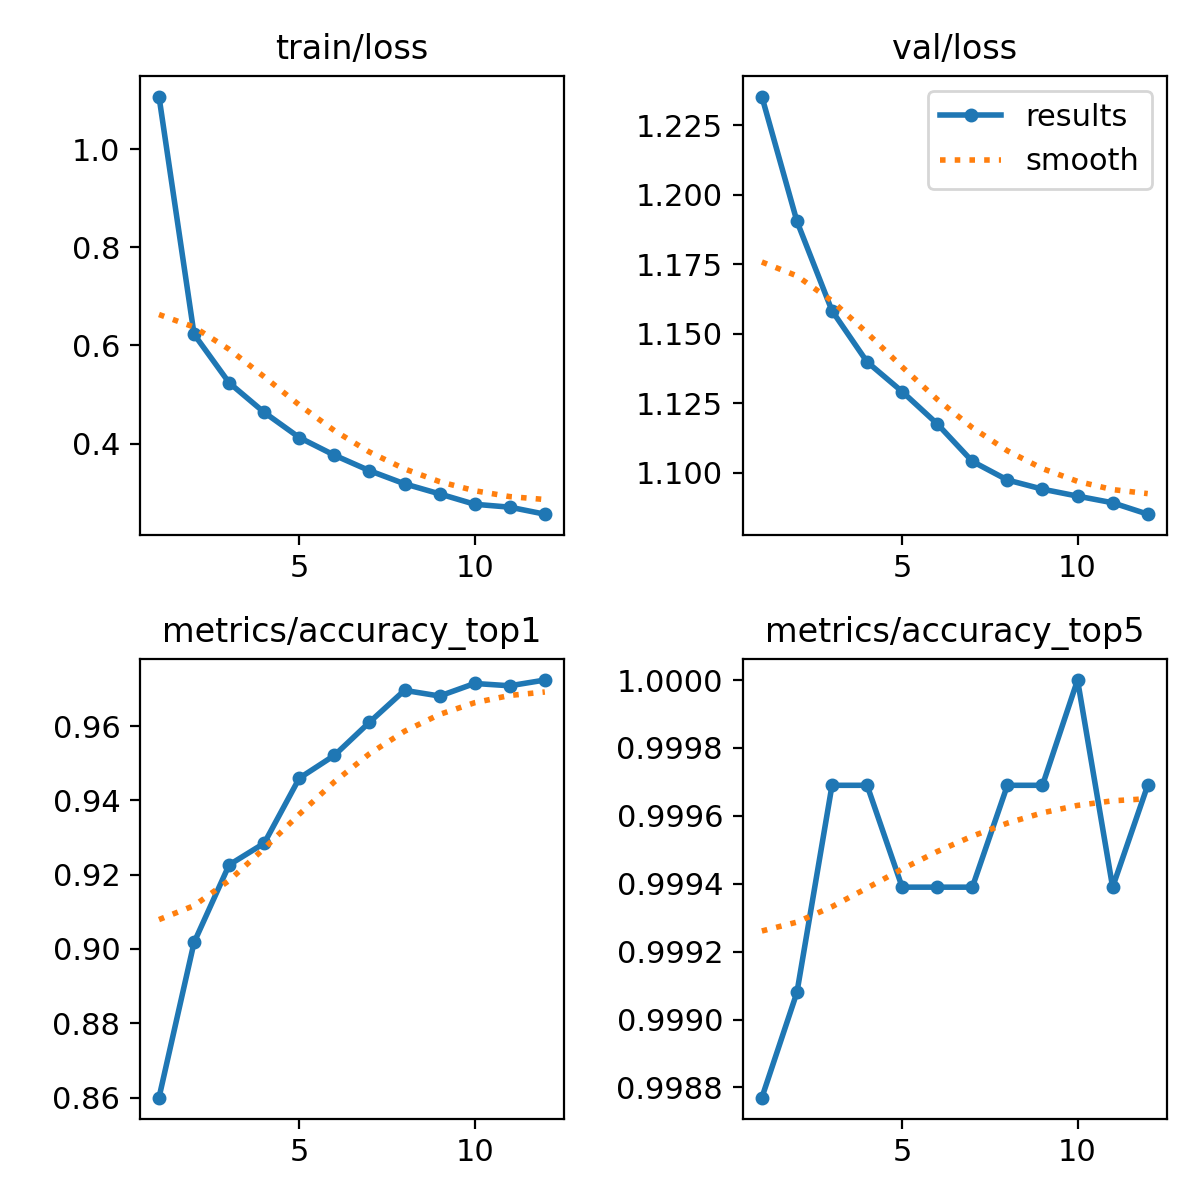

In [ ]:
display(Image(filename="/content/runs/classify/train/results.png"))

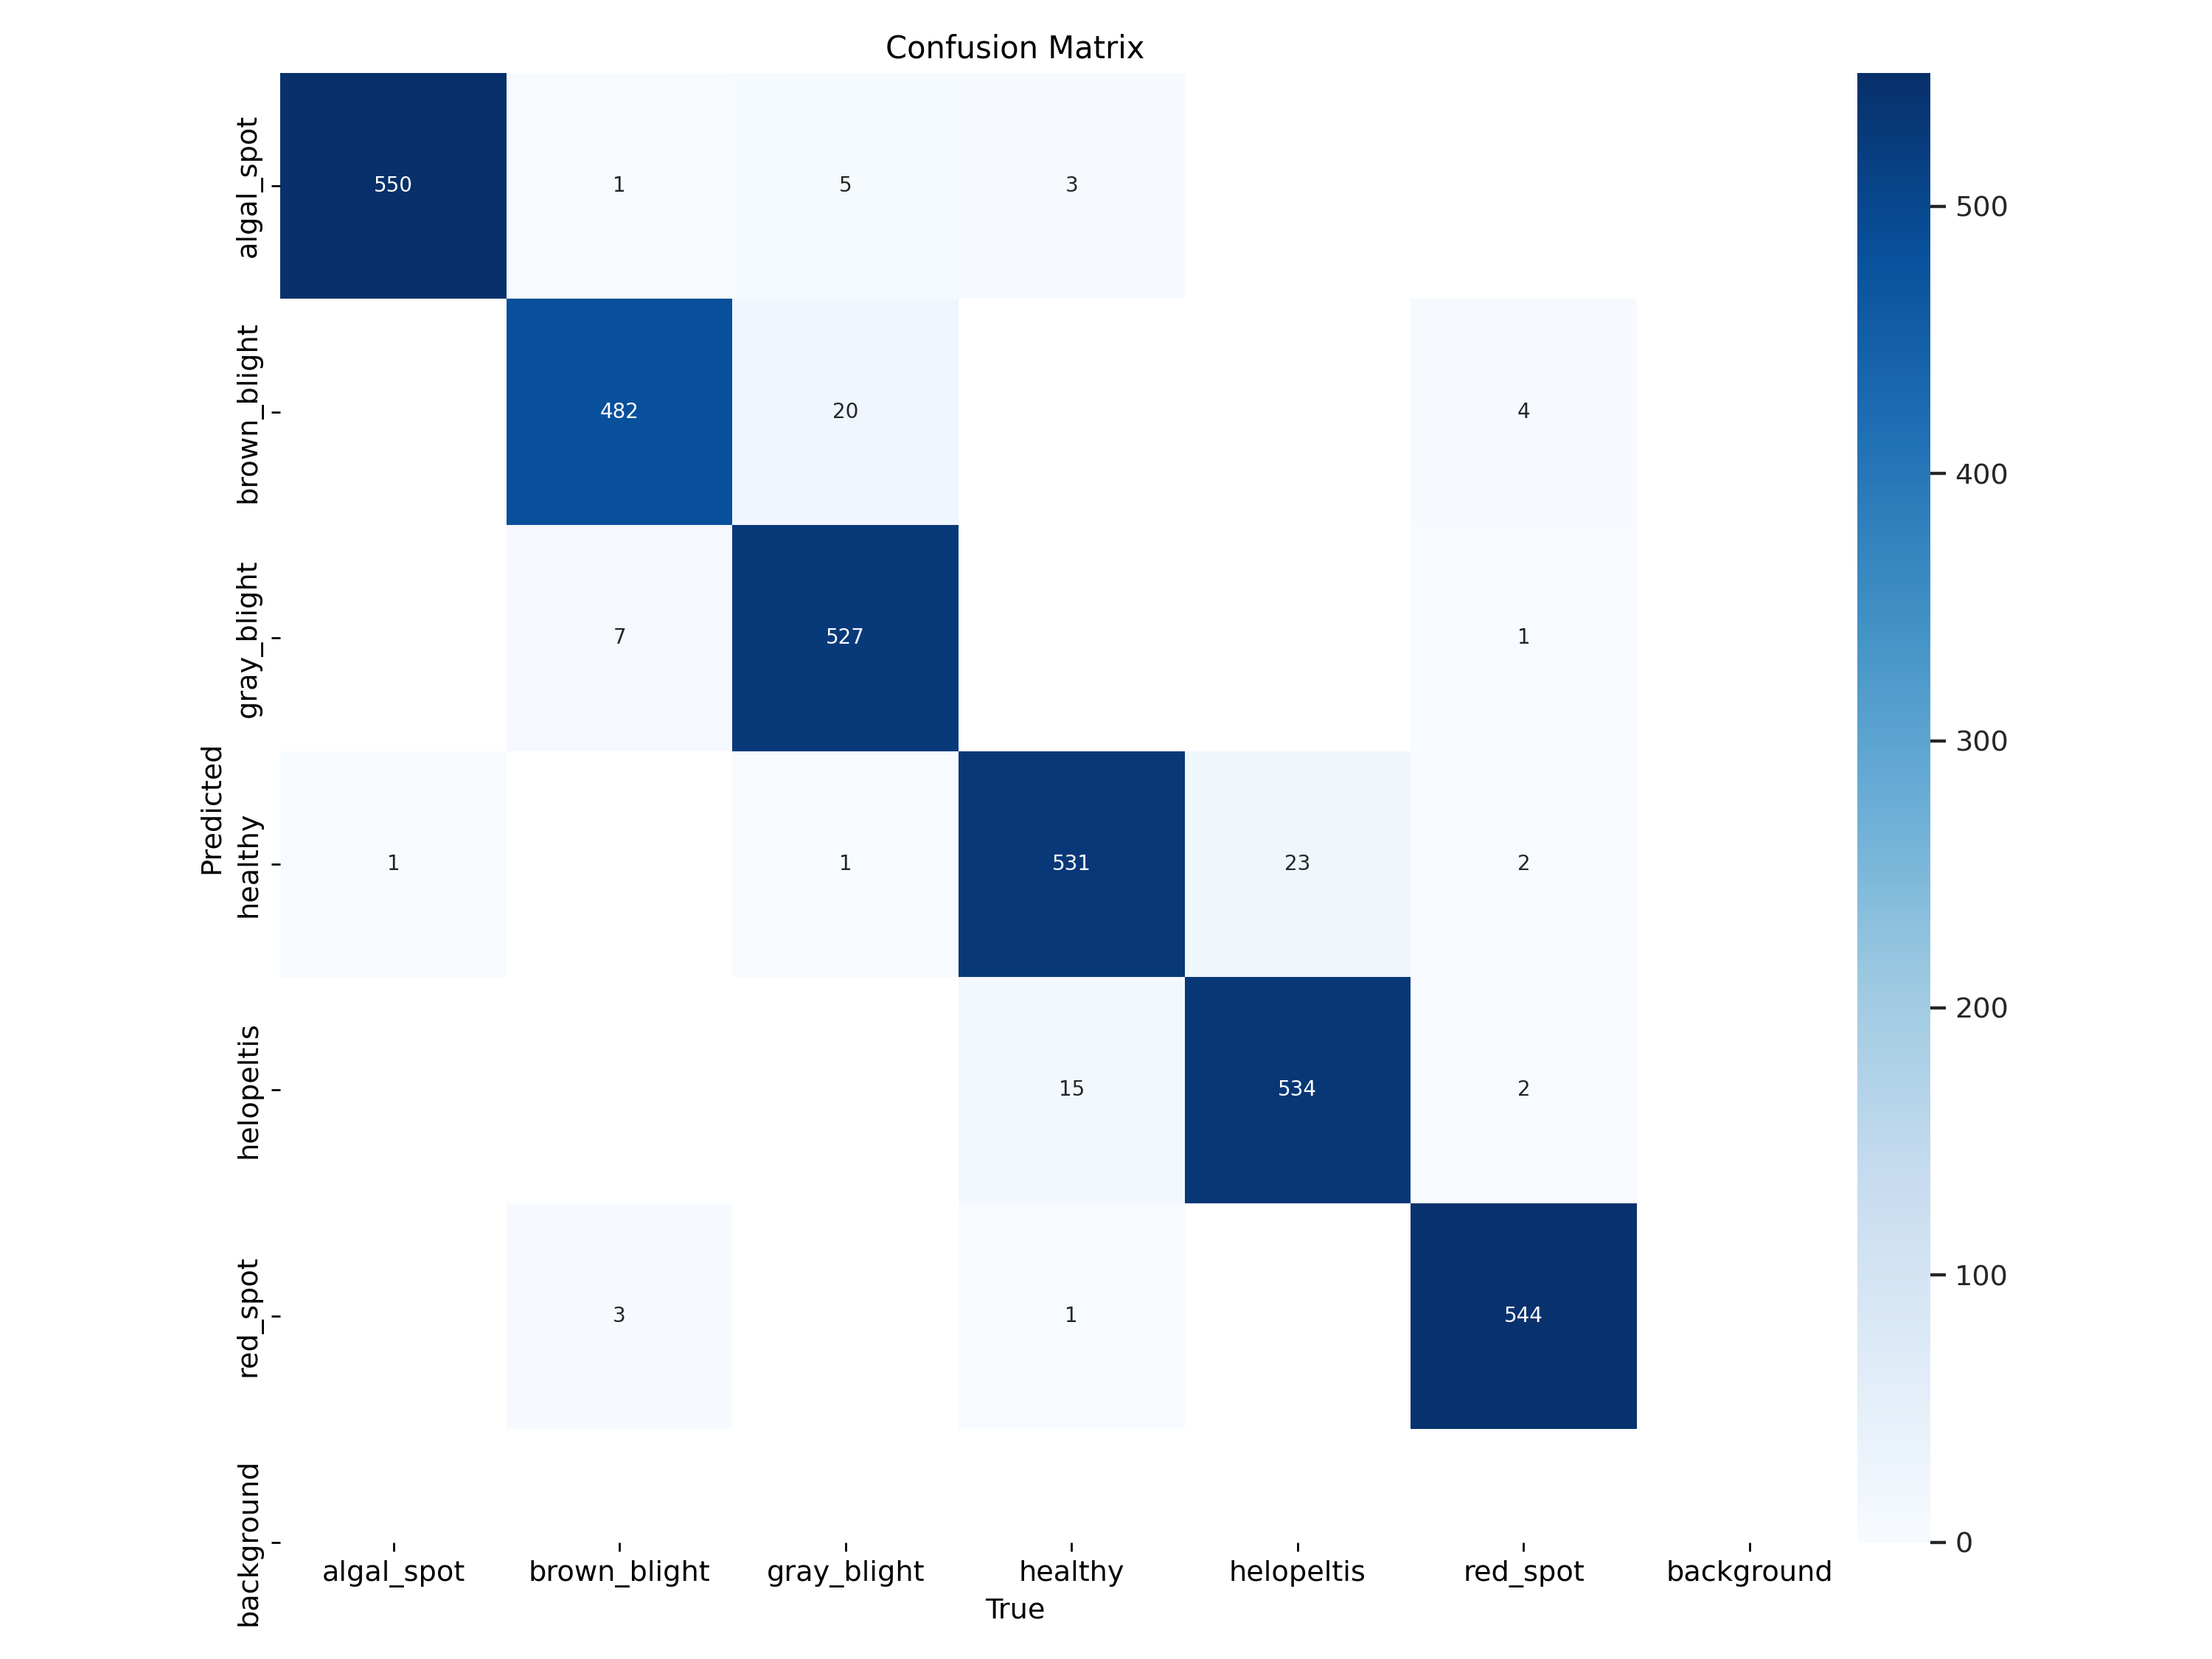

In [ ]:
display(Image(filename="/content/runs/classify/train/confusion_matrix.png"))

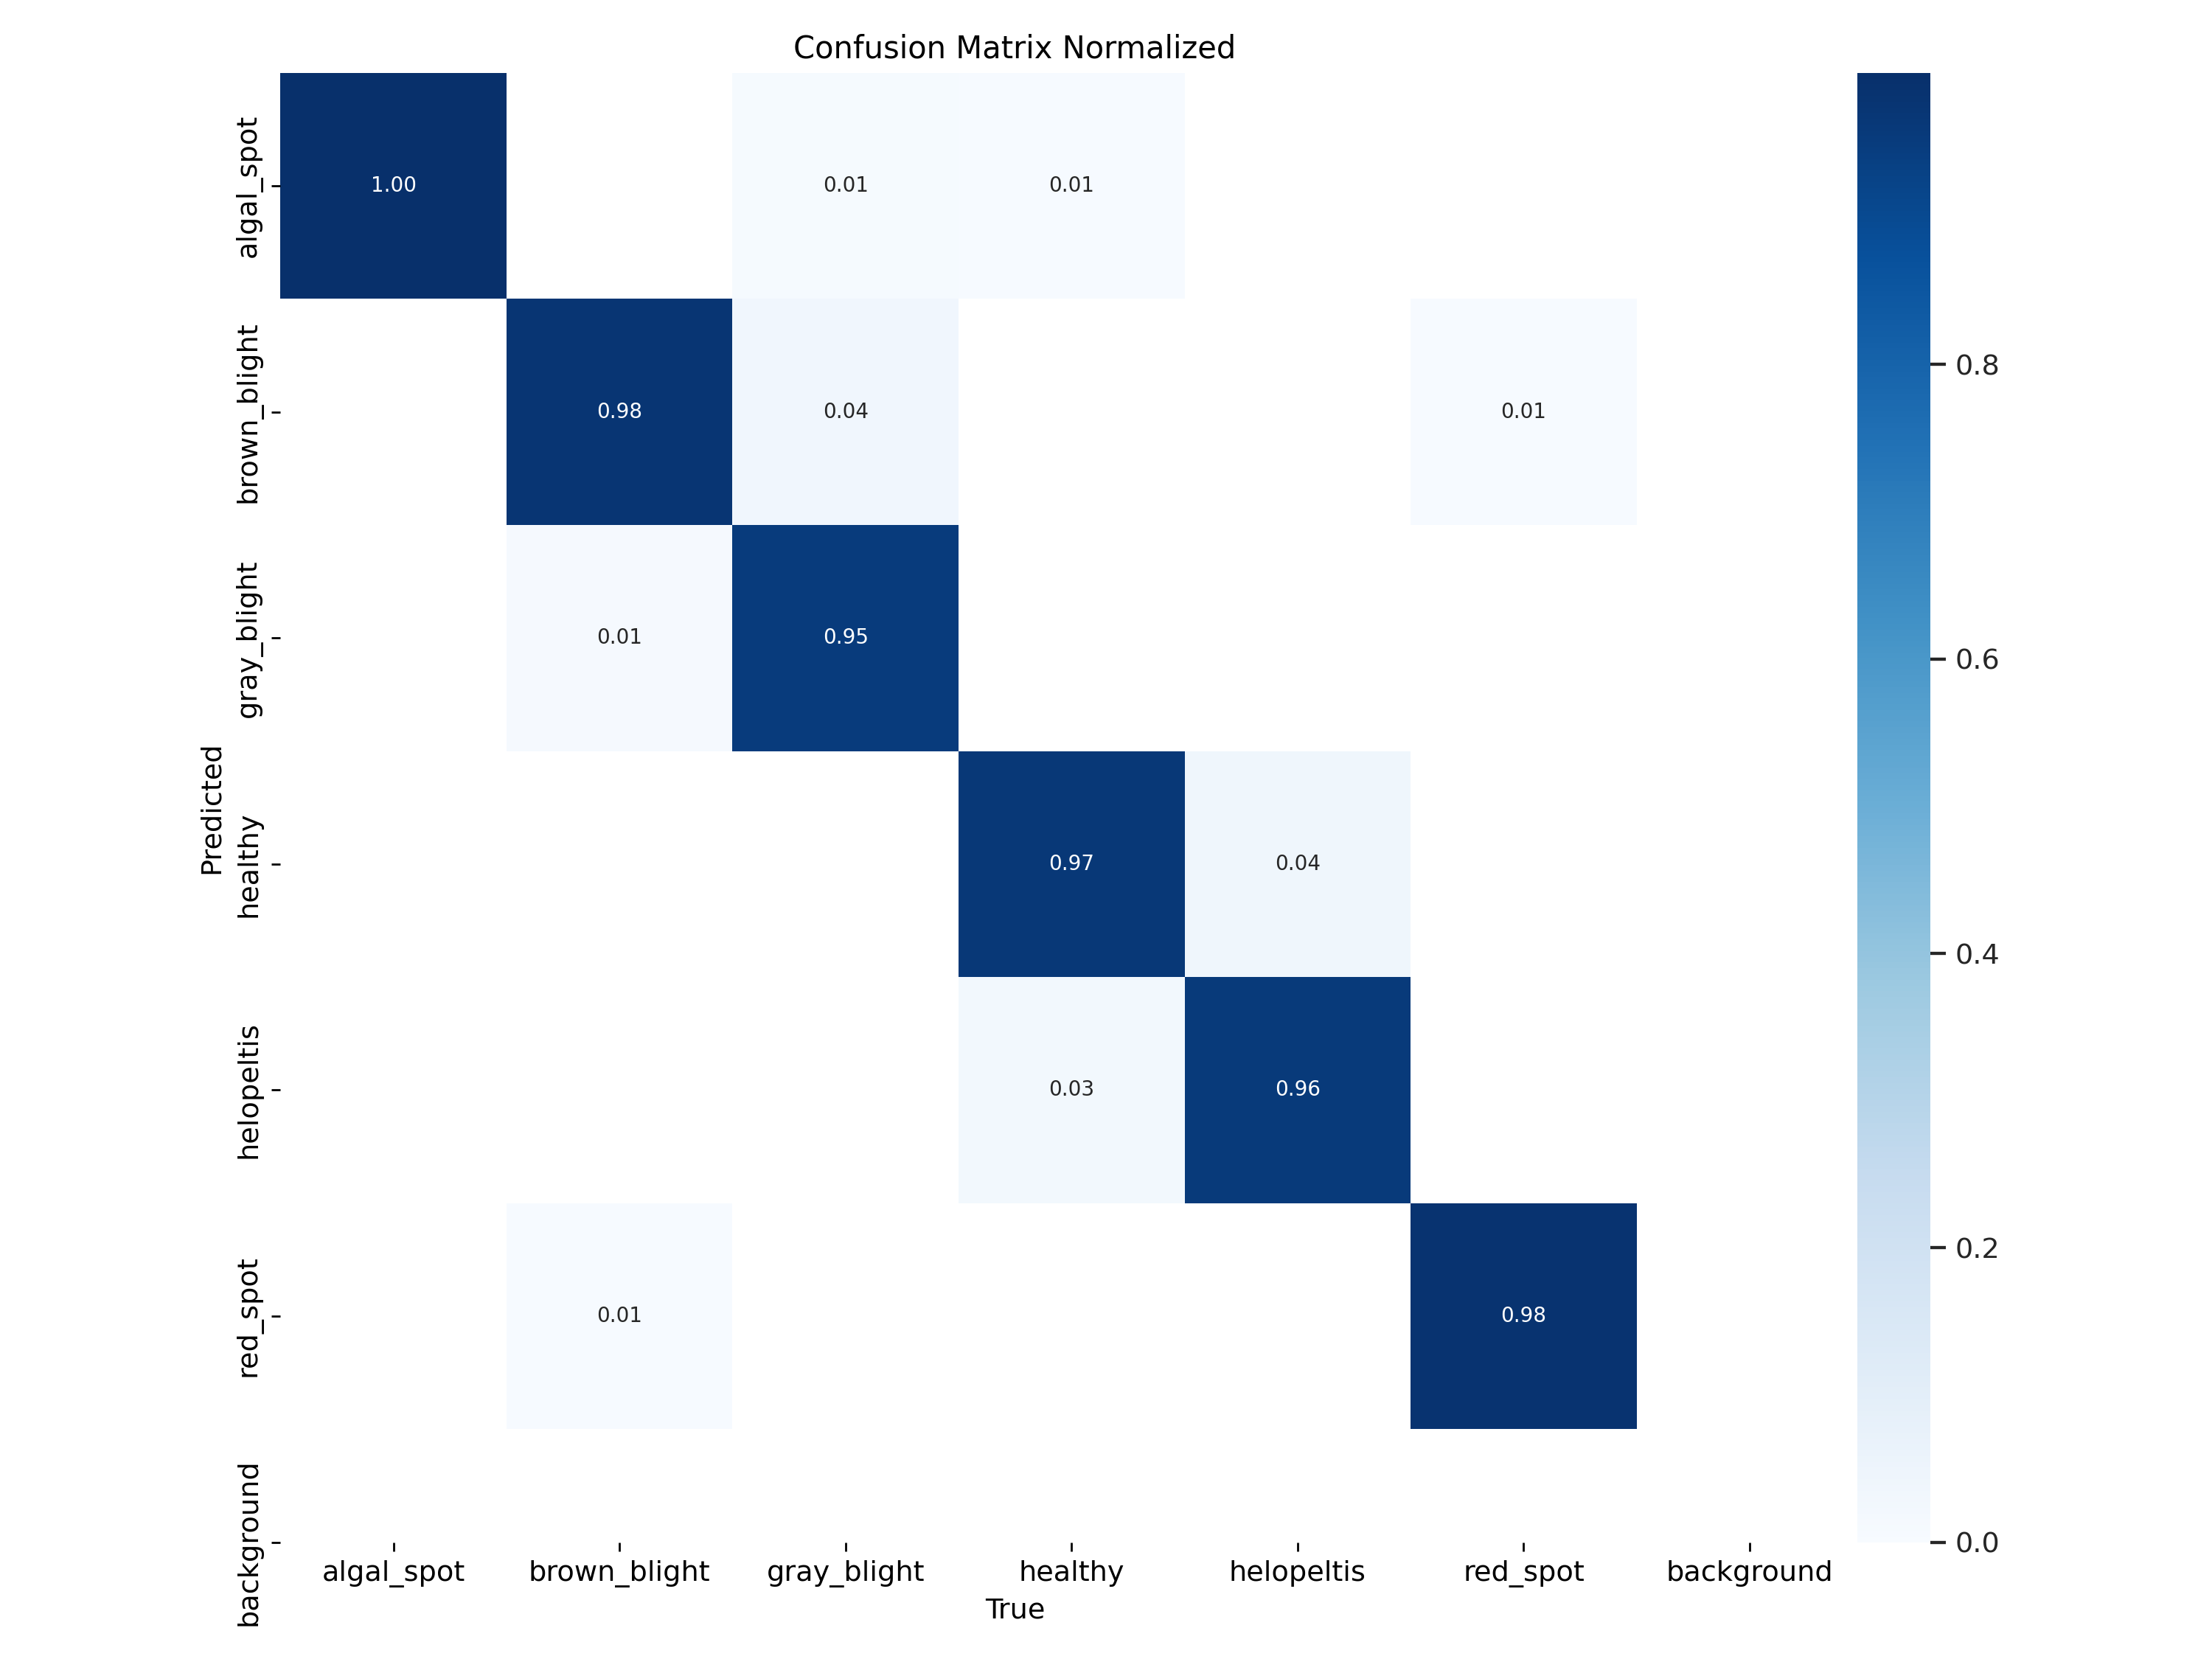

In [ ]:
display(Image(filename="/content/runs/classify/train/confusion_matrix_normalized.png"))

## Inference with Custom Model

In [ ]:
from ultralytics import YOLO

# load a custom model
model = YOLO('/content/best.pt')

Demo_Img="/content/20211205_155349hplts.jpg"

# Predict with the model
results = model(Demo_Img, save=True)

## Download the Model

In [ ]:
# Trigger the download
files.download('/content/runs/classify/train/weights/best.pt')

NameError: name 'files' is not defined

## Others

### Get the data from git

In [1]:
!git clone https://github.com/pavanteja15/tea-dataset

Cloning into 'tea-dataset'...
remote: Enumerating objects: 32513, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 32513 (delta 3), reused 27 (delta 2), pack-reused 32480 (from 1)
Receiving objects: 100% (32513/32513), 160.30 MiB | 30.38 MiB/s, done.
Resolving deltas: 100% (26/26), done.
Updating files: 100% (97325/97325), done.


In [2]:
# Syntax: mv source destination
!mv /content/tea-dataset/Augmented_data /content/
!mv /content/tea-dataset/Final_Dataset /content/
!mv /content/tea-dataset/Merged_Dataset /content/
!mv /content/tea-dataset/Tea_Leaf_Disease /content/

In [3]:
!rm -rf /content/tea-dataset

### Push to git

In [ ]:
# Change directory to the cloned repo
%cd /content/runs

# Add and commit the changes
!git add .
!git commit -m "Add folder to repository"

# Push to GitHub
!git push


/content/runs
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git


In [ ]:
!rm -r /content/runs.zip

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory


### Data Analysis

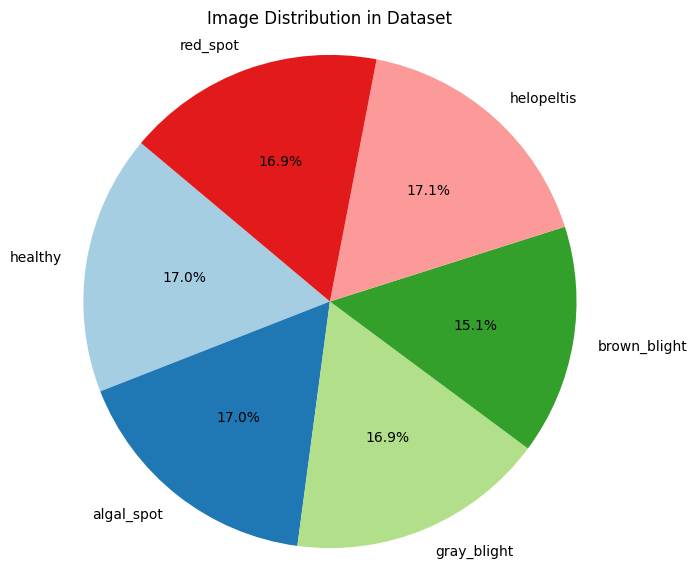

In [ ]:
import matplotlib.pyplot as plt

# Data
categories = ['healthy', 'algal_spot', 'gray_blight', 'brown_blight', 'helopeltis', 'red_spot']
image_counts = [5530, 5499, 5496, 4887, 5535, 5488]

# Create pie chart
plt.figure(figsize=(7, 7))
plt.pie(image_counts, labels=categories, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Image Distribution in Dataset')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()
